In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [4]:
data.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [7]:
data['bathrooms'].value_counts()

1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64

In [8]:
data['parking'].value_counts()

0    299
1    126
2    108
3     12
Name: parking, dtype: int64

In [9]:
data.describe()   #jaha pe integers available hai unko lega

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
data.shape

(545, 13)

In [11]:
data.size    #how many bytes oof data available

7085

In [12]:
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [13]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [14]:
data["mainroad"]=data["mainroad"].map({'yes':1, "no":0})

In [15]:
data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished


In [16]:
#label encoding
data["guestroom"]=data["guestroom"].map({'yes':1, "no":0})
data["basement"]=data["basement"].map({'yes':1, "no":0})
data["hotwaterheating"]=data["hotwaterheating"].map({'yes':1, "no":0})
data["airconditioning"]=data["airconditioning"].map({'yes':1, "no":0})
data["prefarea"]=data["prefarea"].map({'yes':1, "no":0})
#one hot encoding

data=pd.get_dummies(data,columns=['furnishingstatus'])
data


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [17]:
data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0


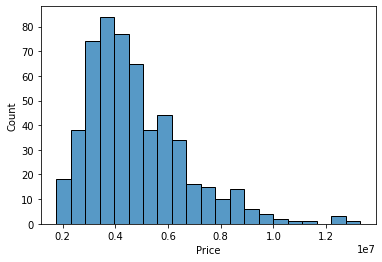

In [18]:
#plt.hist(data["price"])
sns.histplot(data['price'])
#plt.title("Distributuion of price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [19]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179,-0.094086


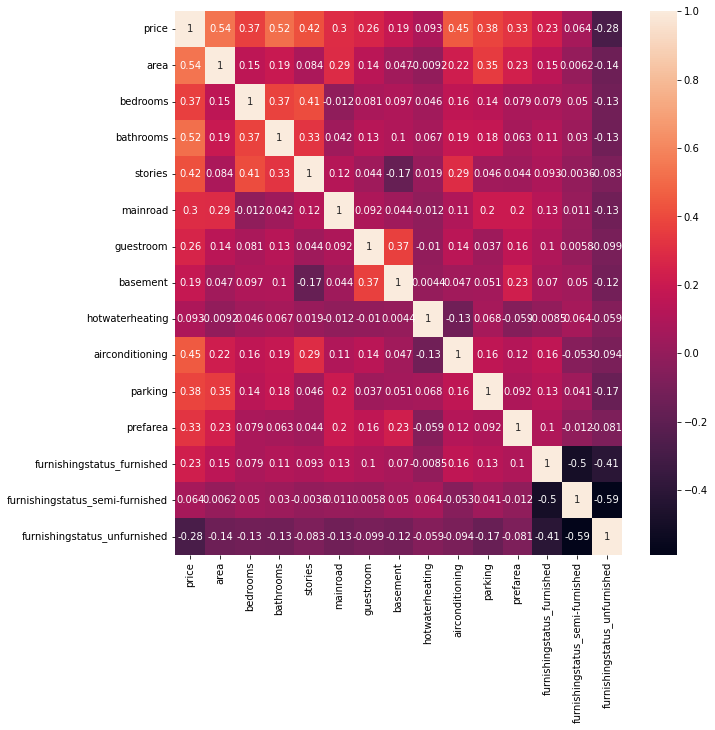

In [20]:
corr_mat=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,annot=True)
plt.title=("Correlation Matrix")
plt.show()

<Axes: xlabel='bedrooms', ylabel='price'>

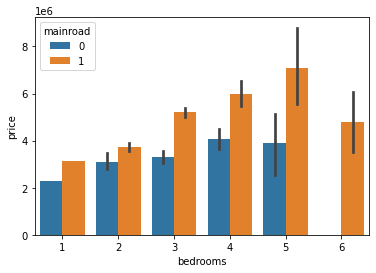

In [21]:
#sns.barplot(data["bedrooms"],data["price"])
sns.barplot(data = data, x="bedrooms", y="price", hue="mainroad")

<Axes: xlabel='bedrooms', ylabel='price'>

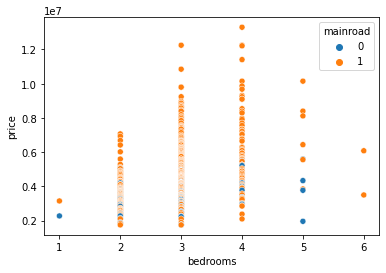

In [22]:
#sns.scatterplot(data['price'],data['area'])

sns.scatterplot(data = data, x="bedrooms", y="price",hue="mainroad")

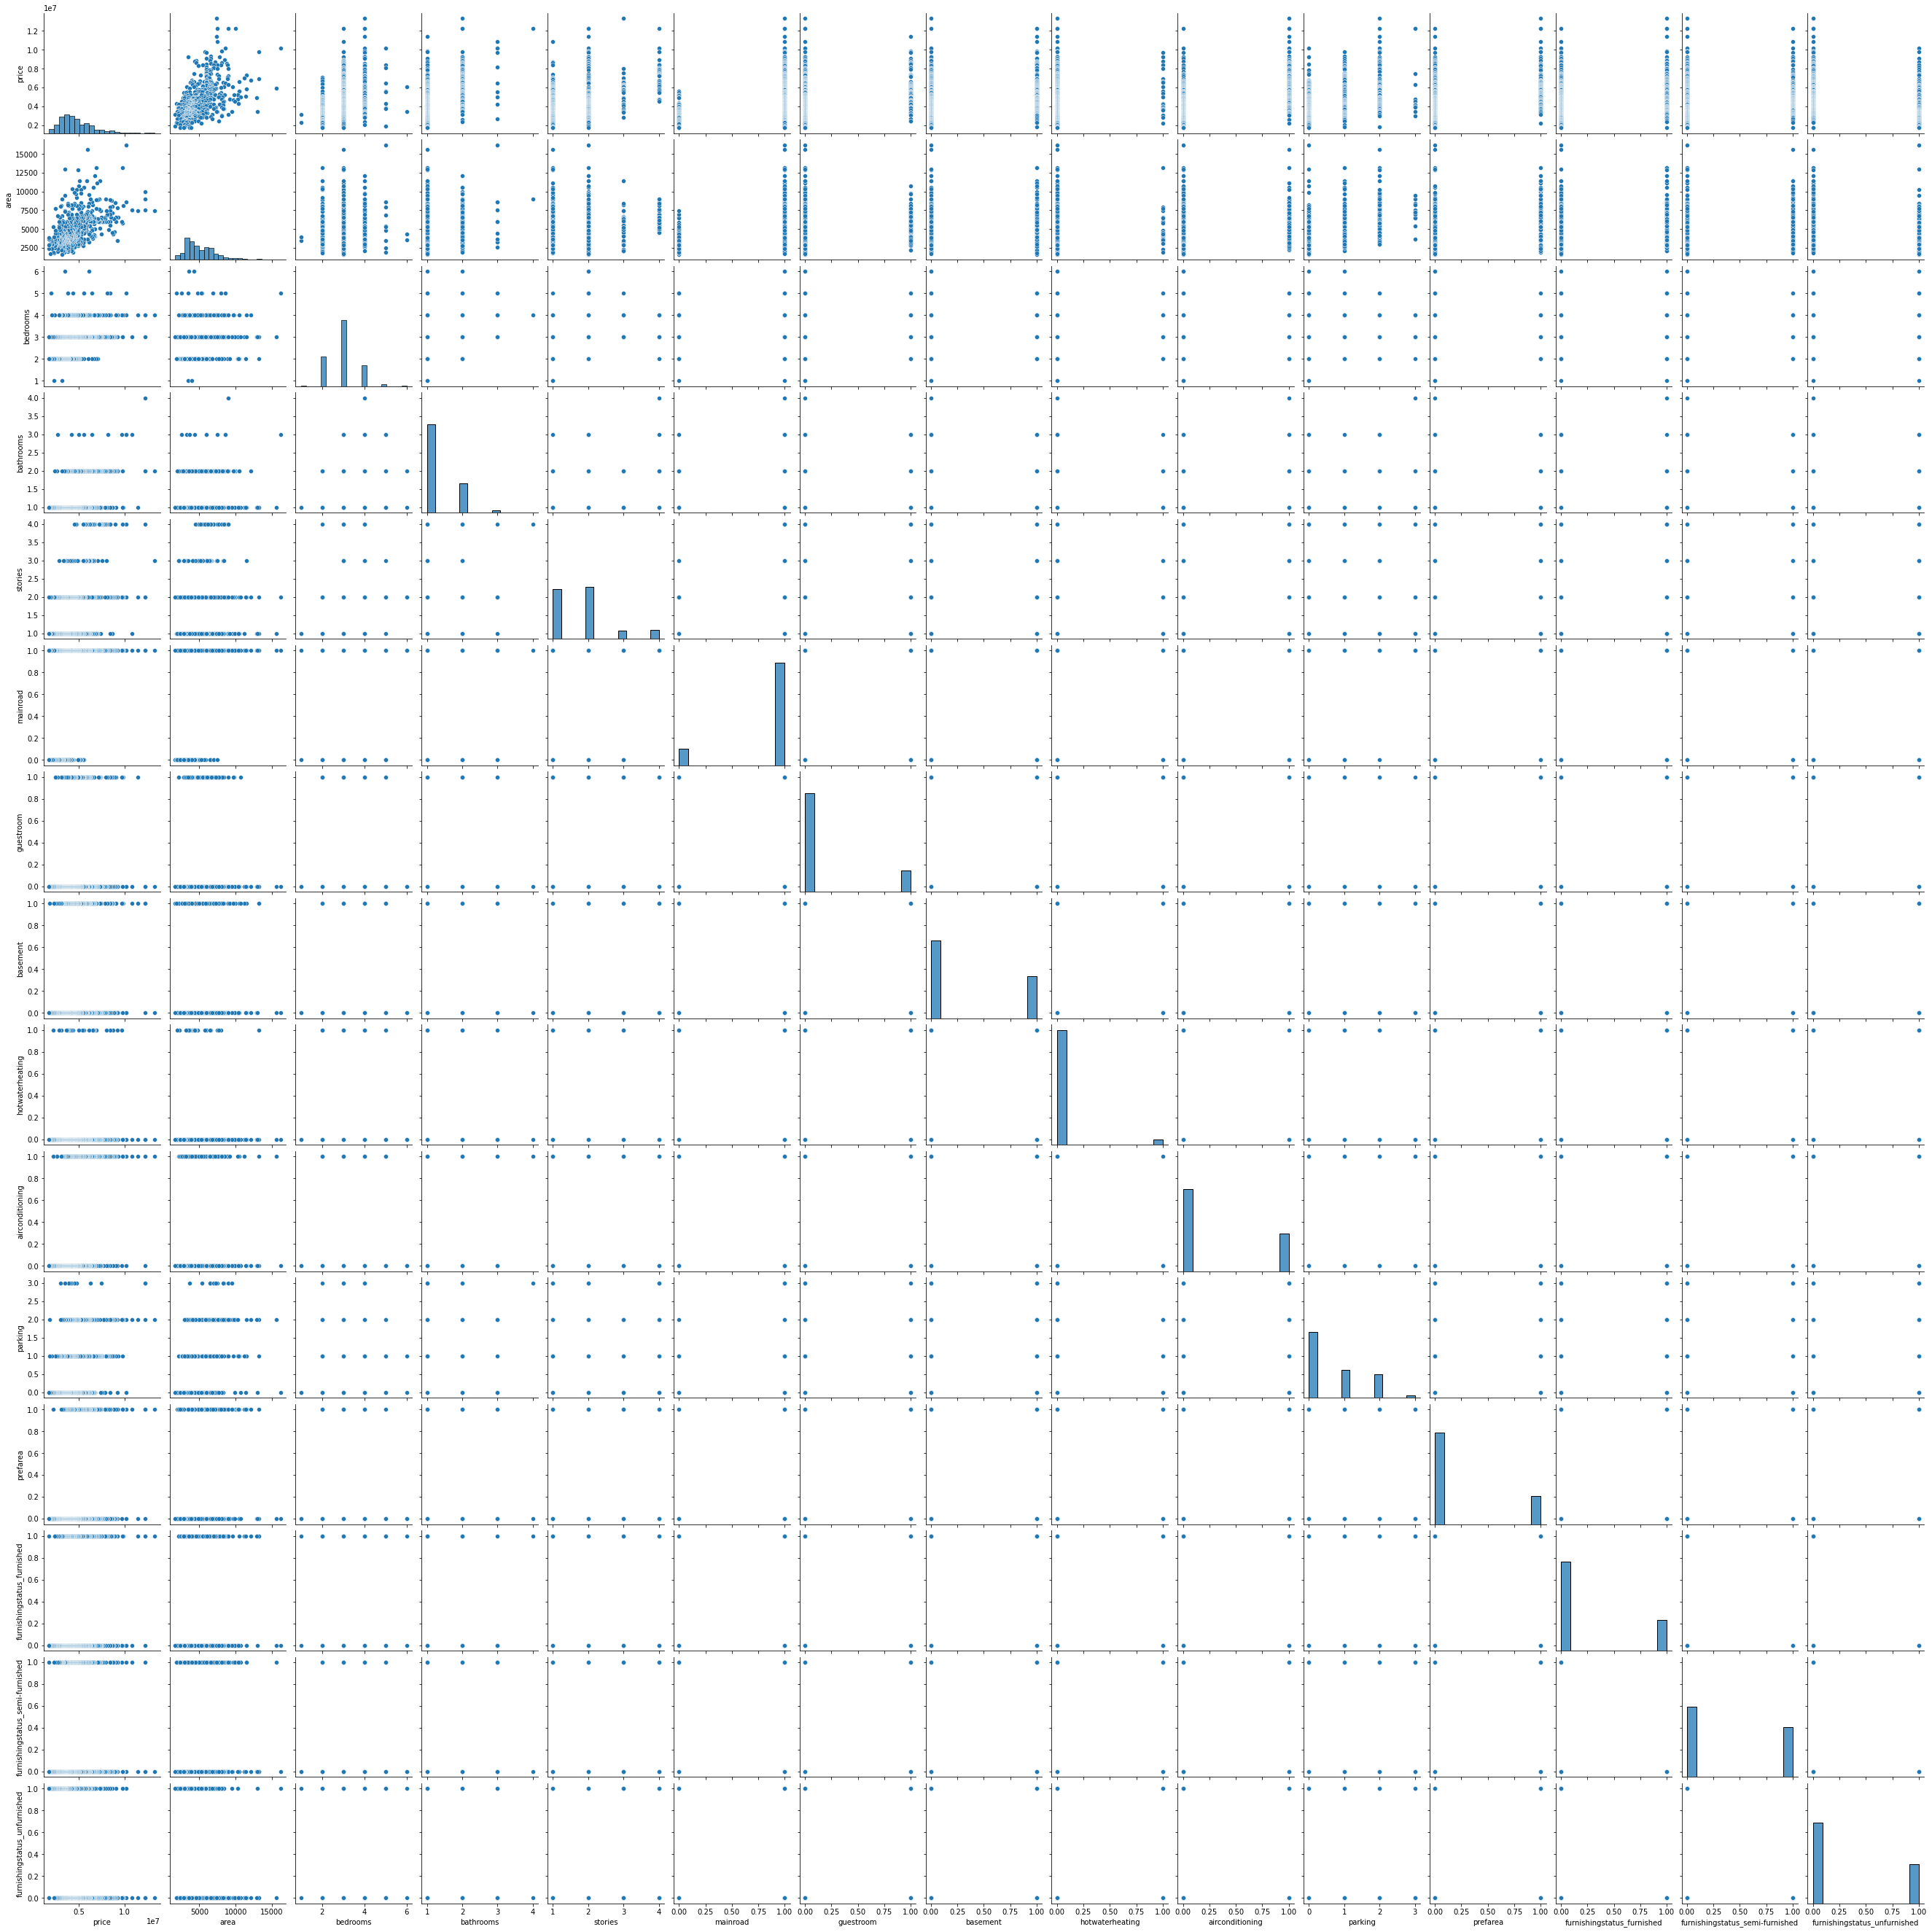

In [23]:
sns.pairplot(data)

In [24]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

<Axes: xlabel='stories', ylabel='price'>

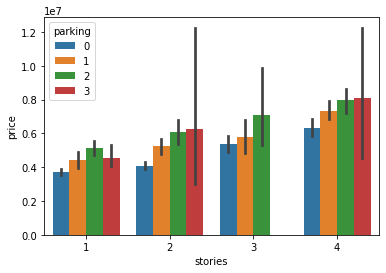

In [25]:
sns.barplot(data = data, x="stories", y="price", hue="parking")

[Text(0.5, 1.0, 'bar graph')]

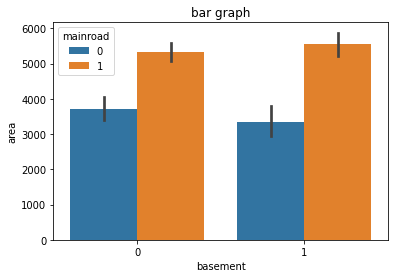

In [26]:
sns.barplot(data = data, x="basement", y="area", hue="mainroad").set(title="bar graph")

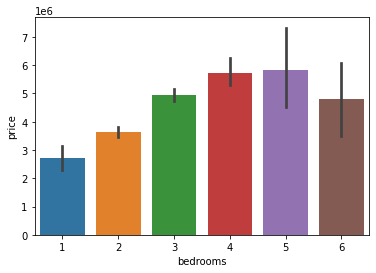

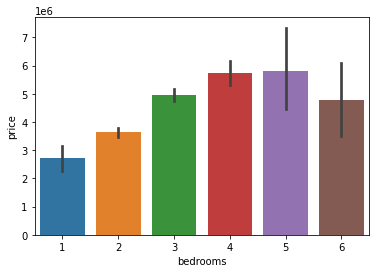

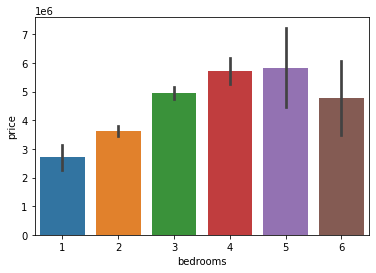

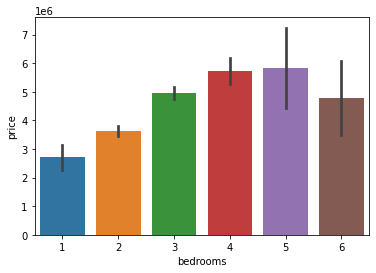

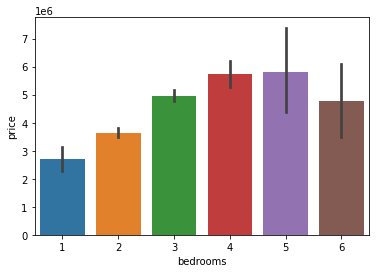

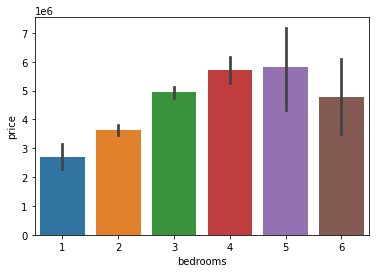

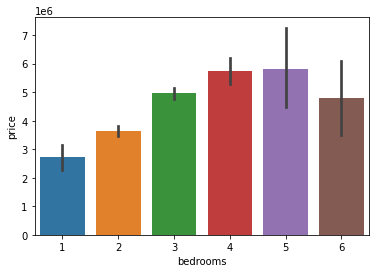

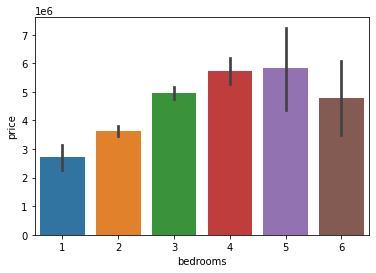

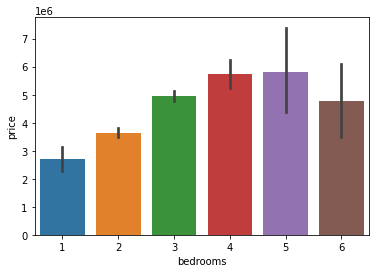

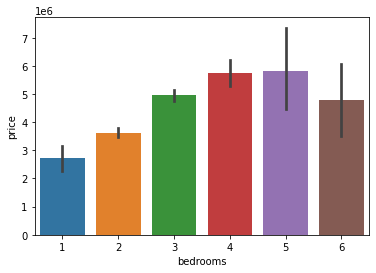

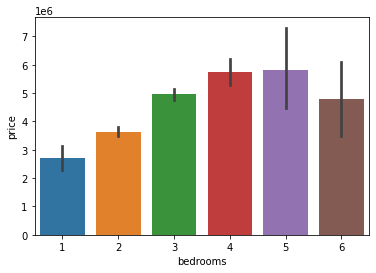

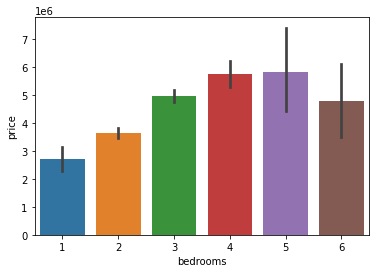

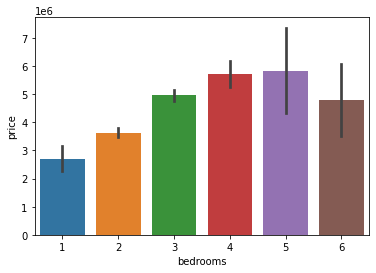

In [27]:
selected_col=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

for col in selected_col:
    
    sns.barplot(data=data,x="bedrooms",y="price")
    plt.show()

In [28]:
data.size

8175

In [29]:
data.shape

(545, 15)

In [30]:
X=data.drop("price",axis=1)
y=data["price"]


In [31]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [32]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)


In [34]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
378,2275,3,1,3,1,0,0,1,1,0,1,0,1,0
505,4000,3,1,2,1,0,0,0,1,0,0,0,0,1
304,8250,3,1,1,1,0,1,0,0,3,0,0,1,0
238,4510,4,2,2,1,0,1,0,0,0,0,0,1,0
328,4500,3,2,2,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,4000,3,2,2,1,0,1,0,1,0,1,0,1,0
132,5200,3,1,3,1,0,0,0,1,0,0,0,1,0
289,5850,2,1,1,1,1,1,0,0,2,0,0,1,0
109,6615,4,2,2,1,1,0,1,0,1,0,0,1,0


In [35]:
y_train

378    3640000
505    2653000
304    4193000
238    4613000
328    3990000
        ...   
70     6790000
132    5810000
289    4200000
109    6090000
480    2940000
Name: price, Length: 408, dtype: int64

In [36]:
len(y_train)

408

In [37]:
#Train test split
#Model Training


In [38]:
LR_model=LinearRegression()

In [39]:
LR_model.fit(X_train,y_train)

LinearRegression()

In [40]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
333,3000,3,1,2,1,0,0,0,0,0,0,0,1,0
37,9000,4,2,4,1,0,0,0,1,2,0,1,0,0
396,3640,2,1,1,1,0,0,0,0,1,0,0,1,0
494,6800,2,1,1,1,0,0,0,0,0,0,0,0,1
536,3420,5,1,2,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,5800,2,1,1,1,1,1,0,1,0,0,0,1,0
148,6360,3,1,3,1,0,0,0,0,0,1,0,1,0
76,6420,3,2,3,1,0,0,0,1,0,1,1,0,0
100,6600,3,2,1,1,0,1,0,1,0,1,0,0,1


In [41]:
# y_pred is the model pred from X_test data
y_pred=LR_model.predict(X_test)


In [42]:
y_pred

array([ 3487376.41188354,  8364673.95956354,  3353360.12340828,
        3420895.41673328,  2824540.04147782,  7263403.69709094,
        6518096.74998251,  4355010.75483552,  3917943.26189122,
        4683067.55339774,  2400593.06889566,  3916926.73593158,
        3720737.2268822 ,  5038317.62540223,  3704726.80111332,
        3719472.41801009,  4924122.14725588,  4108512.49626268,
        6109738.34494274,  6454524.94464935,  5061814.14336855,
        6152088.35944606,  4289161.66954852,  3380041.301177  ,
        4877851.67783783,  2658097.85171444,  4753565.00082132,
        3040627.92833975,  5717518.24280513,  2845199.14124736,
        4055863.49676825,  4573965.39581824,  3783334.61945409,
        5254049.16563766,  6326079.03934154,  2878478.7692571 ,
        2785147.88144051,  6243562.24360934,  5088928.53171668,
        4592315.56461444,  3528820.64945527,  2239935.58834329,
        3744285.77071777,  7248188.86138112,  3254428.38602187,
        4690156.89791429,  3739437.48910

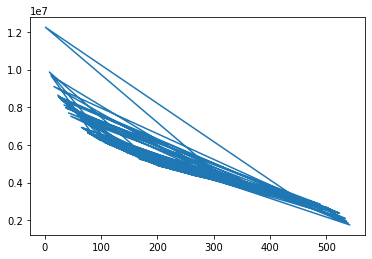

In [43]:
plt.plot(y_test)

(array([[  0.,   2.,  13.,  32.,  28.,  15.,  27.,   8.,   7.,   5.],
        [137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([   0.,  98

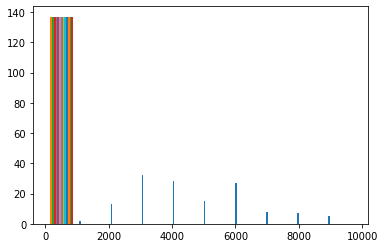

In [45]:
plt.hist(X_test)

(array([19., 28., 22., 27., 17., 10., 11.,  2.,  0.,  1.]),
 array([ 2100690.10265655,  2940717.17750609,  3780744.25235563,
         4620771.32720517,  5460798.40205471,  6300825.47690425,
         7140852.55175379,  7980879.62660332,  8820906.70145286,
         9660933.7763024 , 10500960.85115194]),
 <BarContainer object of 10 artists>)

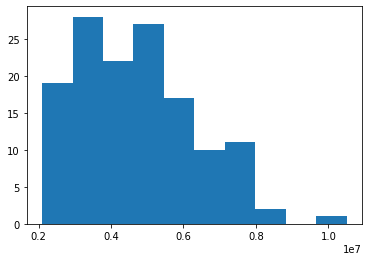

In [46]:
plt.hist(y_pred)

(array([15., 40., 24., 26., 19.,  4.,  5.,  3.,  0.,  1.]),
 array([ 1750000.,  2800000.,  3850000.,  4900000.,  5950000.,  7000000.,
         8050000.,  9100000., 10150000., 11200000., 12250000.]),
 <BarContainer object of 10 artists>)

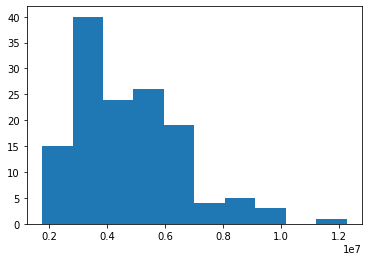

In [44]:
plt.hist(y_test)

In [47]:
y_pred[0]

3487376.4118835377

In [48]:
y_test

333    3920000
37     7980000
396    3500000
494    2730000
536    1960000
        ...   
206    4900000
148    5600000
76     6650000
100    6230000
87     6475000
Name: price, Length: 137, dtype: int64

In [49]:
y_test[333]-y_pred[0]

432623.58811646234